In [29]:
import osmnx as ox
import networkx as nx
import scipy
from itertools import combinations, product
from snowymontreal import snowymontreal
import matplotlib.pyplot as plt

# Usage and example

The library revolves around the use of the function `montreal_snow_path` to compute coordinates for the path to be used along GPS software inside of snowplow machines.
Here we will explain exactly the steps and show graphically what happens when a path is computed.
For the example, we will be using the district of Anjou.

First we download the graph using OSMNx from the Open Street Map Database.

In [40]:
graph = ox.graph_from_place("Anjou, Montreal, Canada", network_type='drive', truncate_by_edge=True)

/home/alexandre/.local/lib/python3.8/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


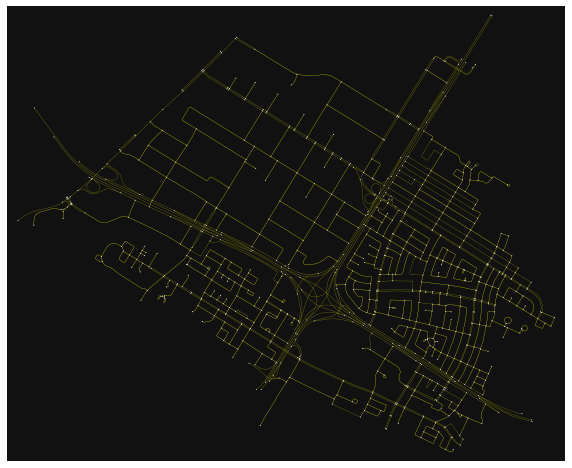

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6888719ca0>)

In [41]:
ox.plot_graph(graph, figsize=(10, 10), node_size=0.9, edge_color='y', edge_linewidth=0.2)

In order to be able to apply the algorithm on the graph, it has to be strongly connected. We can ensure this by only keeping the largest component of the graph.
We also have to project it in order to have access to coordinates.

We will also add together the intersections that are really close in order to better replicate real life, and to make the work easier for the algorithm.

In [35]:
graph = ox.utils_graph.get_largest_component(graph, strongly=True)
g_proj = ox.project_graph(graph)
graph = ox.consolidate_intersections(g_proj, tolerance=10, rebuild_graph=True)

/home/alexandre/.local/lib/python3.8/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


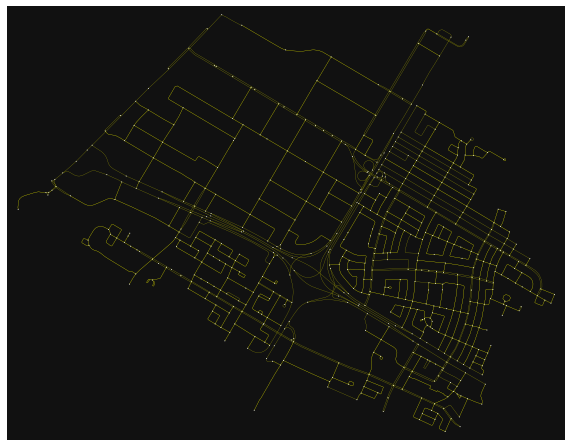

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6888328820>)

In [39]:
ox.plot_graph(graph, figsize=(10, 10), node_size=0.9, edge_color='y', edge_linewidth=0.2)

We then apply our algorithm to transform the graph into an eulerian one.

In [37]:
graph_euler = snowymontreal.eulerize_directed_weighted(graph)

Now we only have to find an eulerian circuit in this graph.

In [42]:
it = nx.eulerian_circuit(graf)
edgeList = []
i = 0
for edge in it:
    if i == 0:
        edgeList.append(edge[0])
    edgeList.append(edge[1])
    i += 1
len(edgeList)

1718

Running this shows the path being constructed

In [ ]:
from IPython.display import clear_output

for i in range(1, len(edgeList)):
    clear_output(wait=True)
    ox.plot_graph_route(montreal3, edgeList[:i], figsize=(10, 10), node_size=1, edge_color='y', edge_linewidth=0.2, route_linewidth=0.5)

Here are images of the different steps of the path being constructed

/home/alexandre/.local/lib/python3.8/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


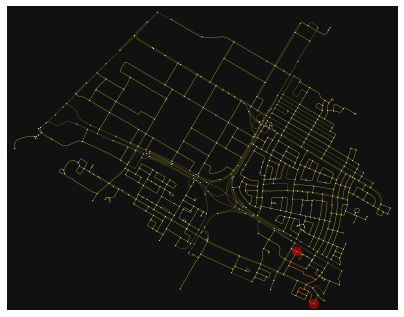

/home/alexandre/.local/lib/python3.8/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


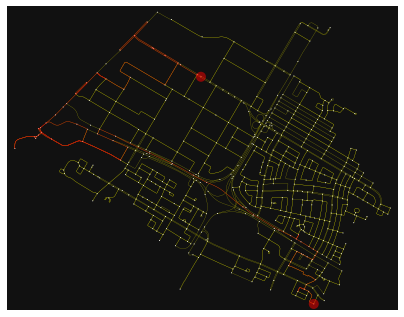

/home/alexandre/.local/lib/python3.8/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


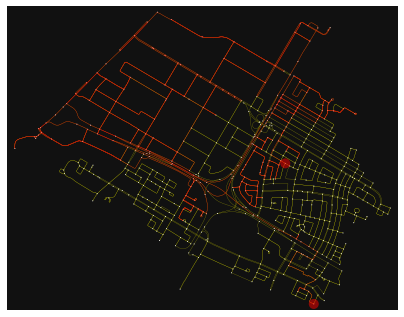

/home/alexandre/.local/lib/python3.8/site-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


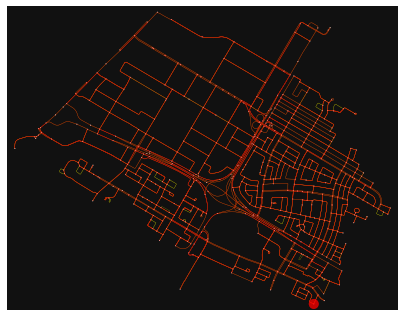

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f688de87790>)

In [47]:
ox.plot_graph_route(montreal3, edgeList[:10], figsize=(7, 7), node_size=1, edge_color='y', edge_linewidth=0.2, route_linewidth=0.5)
ox.plot_graph_route(montreal3, edgeList[:100], figsize=(7, 7), node_size=1, edge_color='y', edge_linewidth=0.2, route_linewidth=0.5)
ox.plot_graph_route(montreal3, edgeList[:500], figsize=(7, 7), node_size=1, edge_color='y', edge_linewidth=0.2, route_linewidth=0.5)
ox.plot_graph_route(montreal3, edgeList[:], figsize=(7, 7), node_size=1, edge_color='y', edge_linewidth=0.2, route_linewidth=0.5)